In [1]:
%%capture
%pip install qiskit
%pip install pylatexenc
%pip install qiskit-aer

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(1) # 1 qubit
c = ClassicalRegister(1)  # 1 classical bit store
qc = QuantumCircuit(q,c)  # quantumcirucit

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


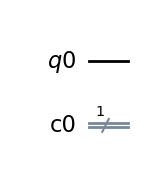

In [3]:
qc.draw('mpl')

In [4]:
from qiskit.quantum_info import Statevector

In [5]:
psi1 = Statevector(qc)
psi1.draw('latex')

<IPython.core.display.Latex object>

In [6]:
from qiskit.visualization import plot_state_qsphere

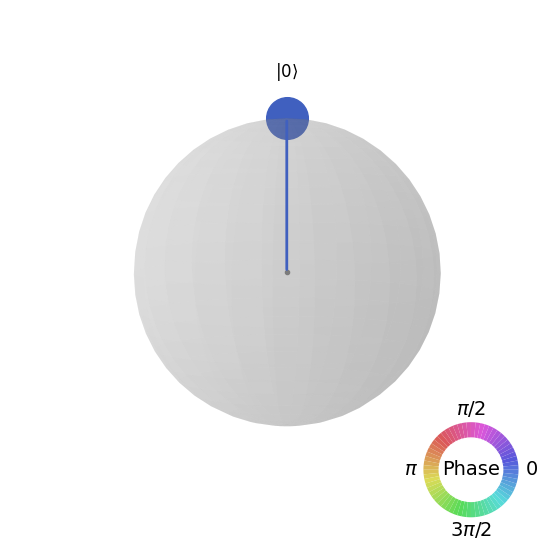

In [7]:
plot_state_qsphere(qc)

In [8]:
from qiskit.quantum_info import DensityMatrix

In [9]:
rho1 = DensityMatrix(qc)
rho1.draw('latex',prefix='\\rho_1 = ')

<IPython.core.display.Latex object>

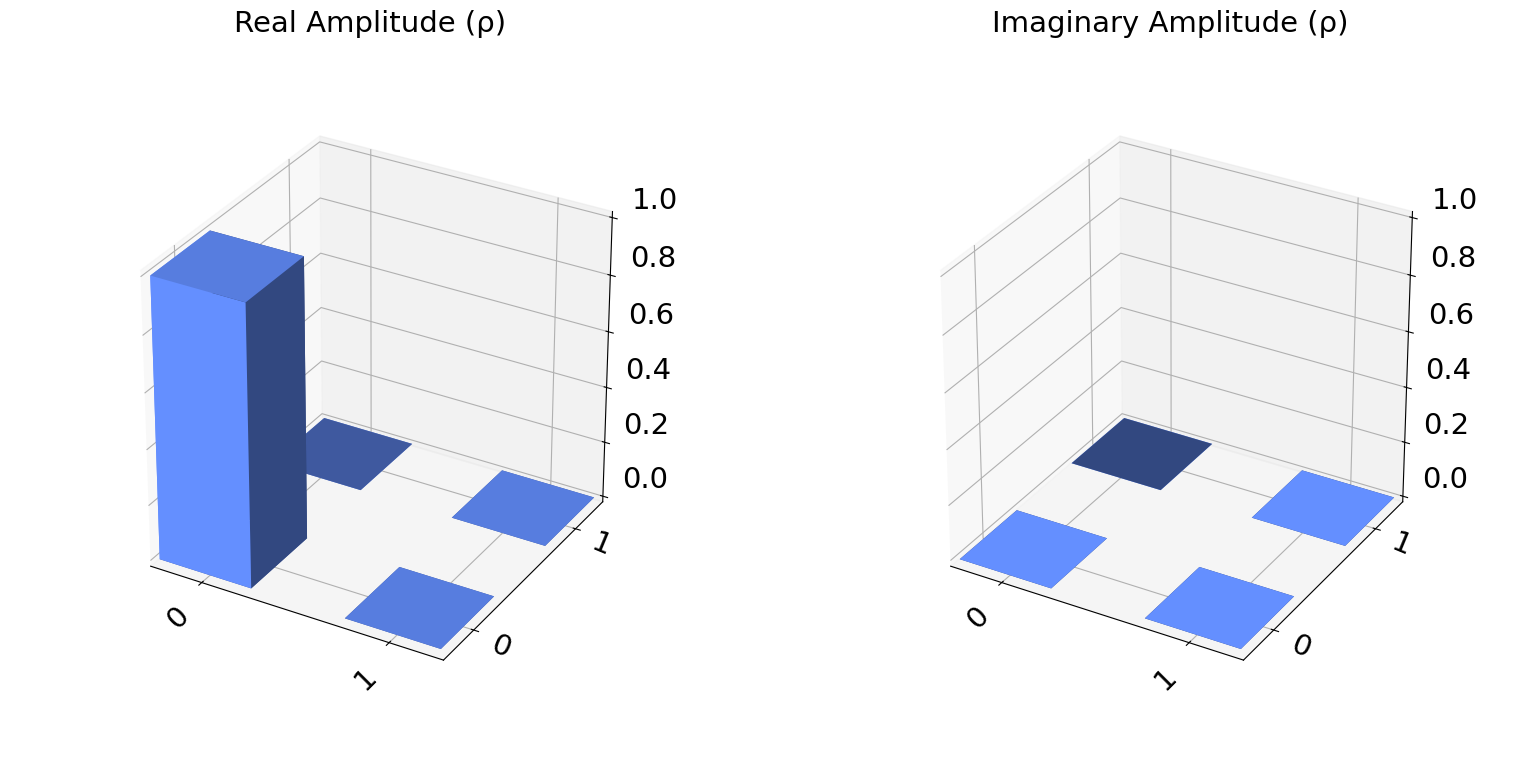

In [10]:
from qiskit.visualization import plot_state_city
plot_state_city(qc)

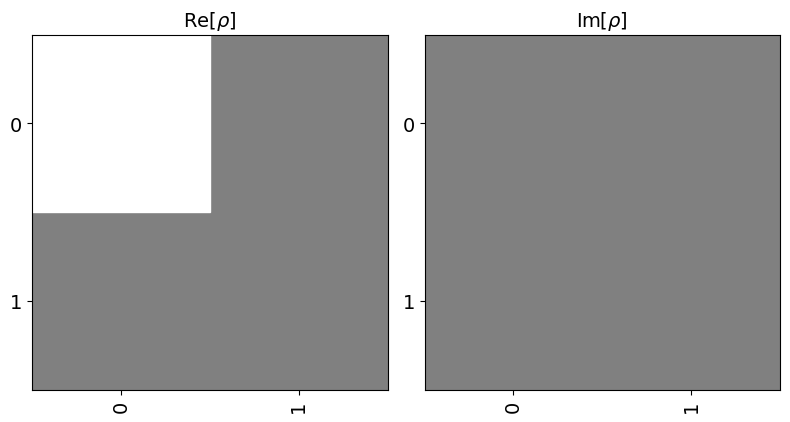

In [11]:
from qiskit.visualization import plot_state_hinton
plot_state_hinton(qc)

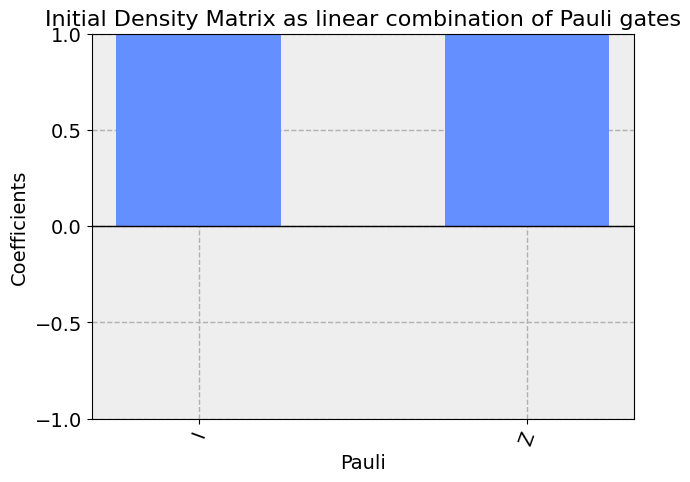

In [12]:
from qiskit.visualization import plot_state_paulivec
plot_state_paulivec(qc,title='Initial Density Matrix as linear combination of Pauli gates')

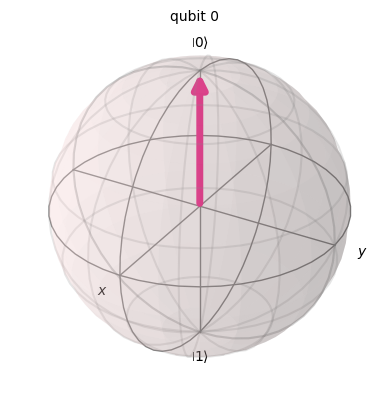

In [13]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(qc)

In [14]:
purity = rho1.purity()
print(purity)

(1+0j)


In [15]:
qc.h(q[0])

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


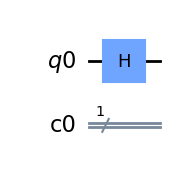

In [16]:
qc.draw('mpl')

In [17]:
psi2 = Statevector(qc)
psi2.draw('latex')

<IPython.core.display.Latex object>

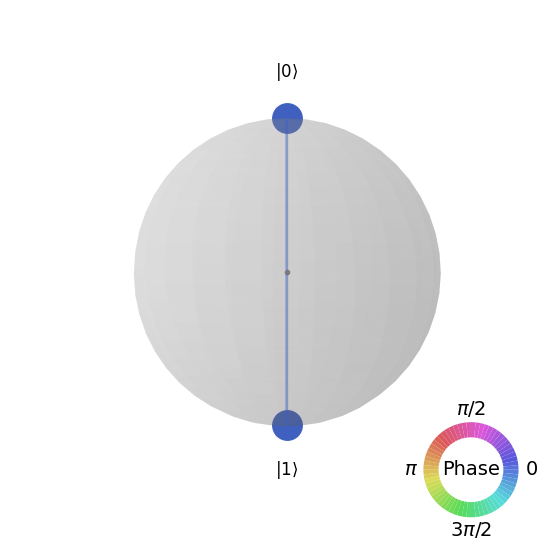

In [18]:
plot_state_qsphere(qc)

In [19]:
rho2 = DensityMatrix(qc)
rho2.draw('latex',prefix='\\rho_2=')

<IPython.core.display.Latex object>

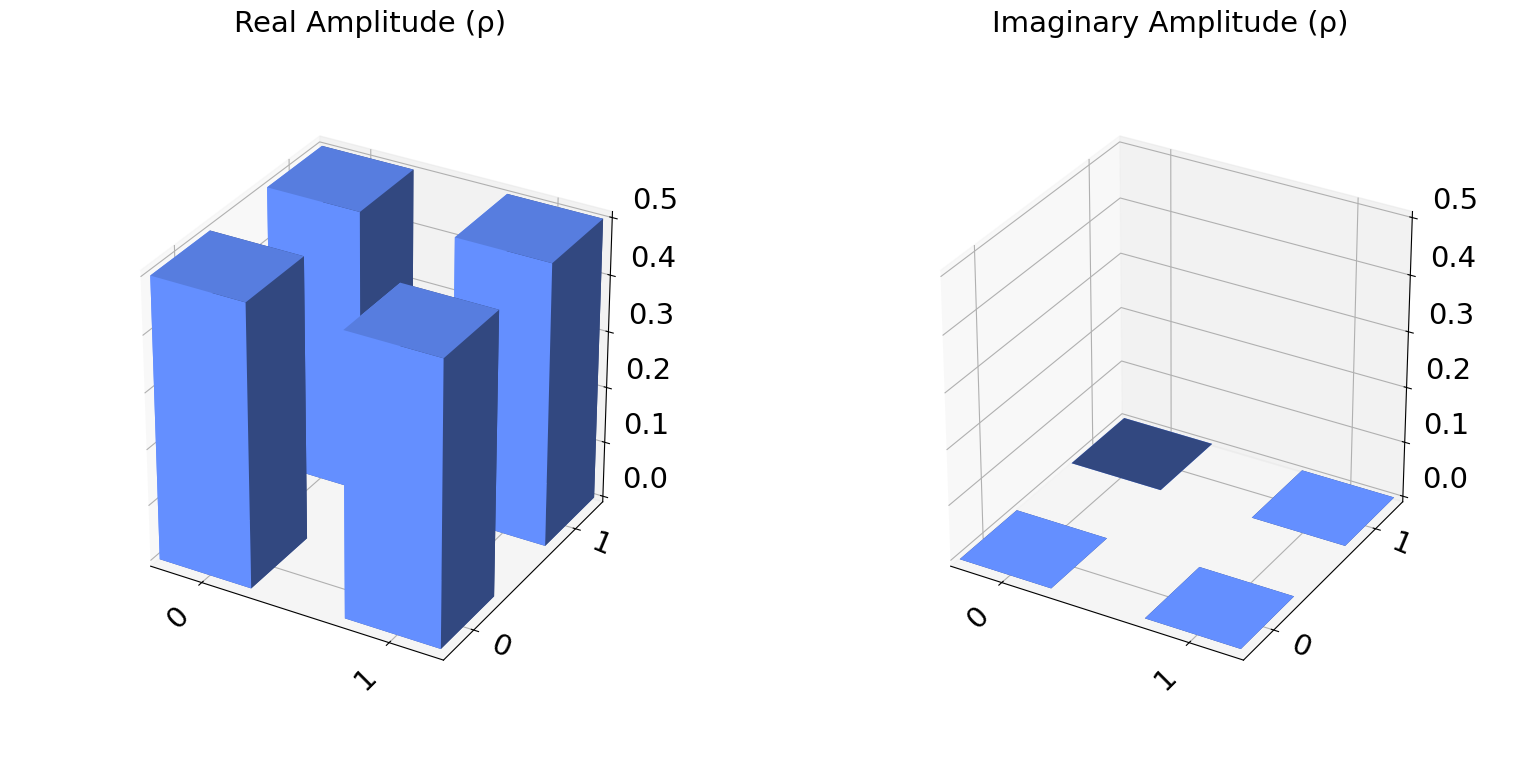

In [20]:
plot_state_city(qc)

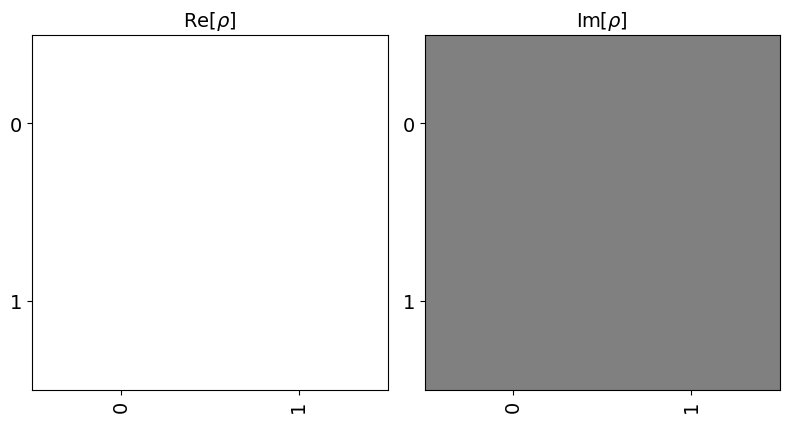

In [21]:
plot_state_hinton(qc)

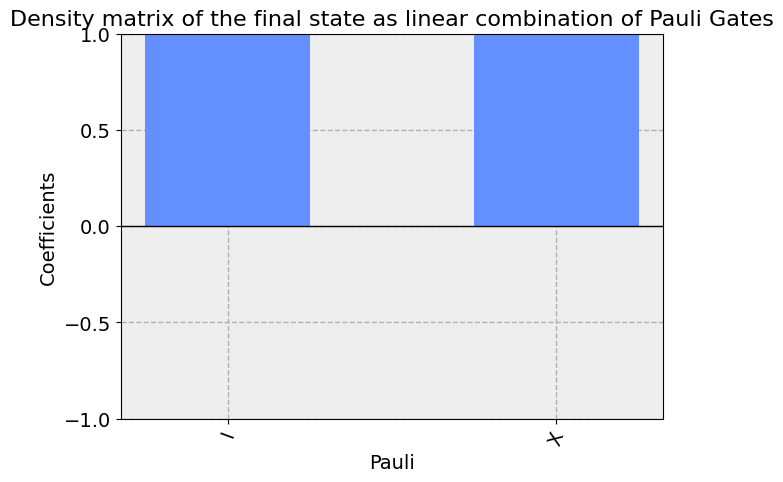

In [22]:
plot_state_paulivec(qc, title = 'Density matrix of the final state as linear combination of Pauli Gates')

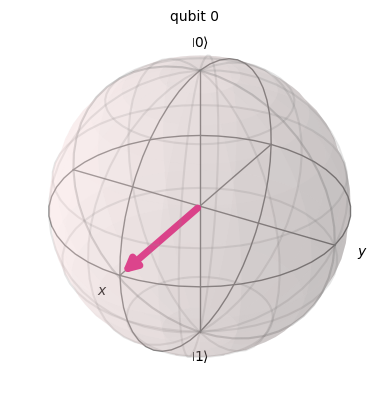

In [23]:
plot_bloch_multivector(qc)

In [24]:
purityf = rho2.purity()
print(purityf)

(0.9999999999999996+0j)


In [25]:
from qiskit.quantum_info import state_fidelity

In [26]:
fidelity = state_fidelity(psi1,psi2)
print(fidelity)

0.4999999999999999


In [27]:
fidelity = state_fidelity(rho1,rho2)
print(fidelity)

0.5000000000000002


In [28]:
qc.measure(q[0],c[0])

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


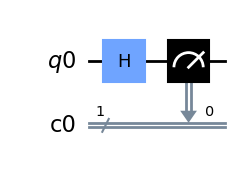

In [29]:
qc.draw('mpl')

In [30]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 510, '0': 514}


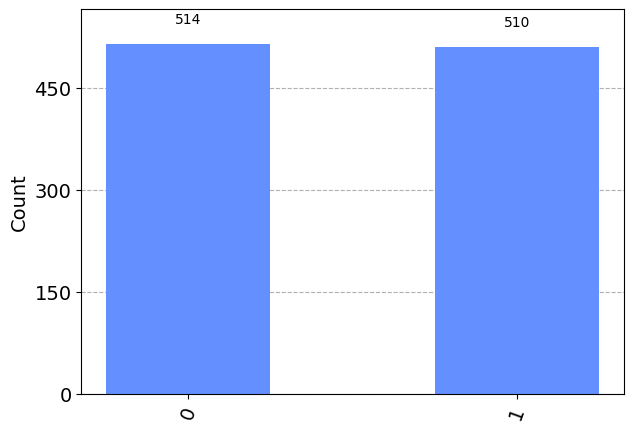

In [31]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)